# 第II部
# 第12章 二項検定

In [1]:
sapply(c("pipeR", "dplyr", "tidyr", "ggplot2", "readr", "readxl", "Cairo", "grid", "gridExtra"), 
       require, character.only = TRUE)

Loading required package: pipeR
Loading required package: dplyr
Warning message:
: package 'dplyr' was built under R version 3.3.1
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: readr
Loading required package: readxl
Loading required package: Cairo
Loading required package: grid
Loading required package: gridExtra
Warning message:
: package 'gridExtra' was built under R version 3.3.1
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



pipeR     dplyr     tidyr   ggplot2     readr    readxl     Cairo      grid 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 
gridExtra 
     TRUE

* 日ハム : 楽天 = 17:3
* 日ハムの方が強いか => 勝つ確率が0.5より大きいかどうか => 帰無仮説: 勝つ確率は0.5（片側検定）

勝つ確率が0.5の時に17勝する確率は

In [2]:
dbinom(17, 20, 0.5)

[1] 0.001087189

In [3]:
options(repr.plot.width = 4, repr.plot.height = 4)

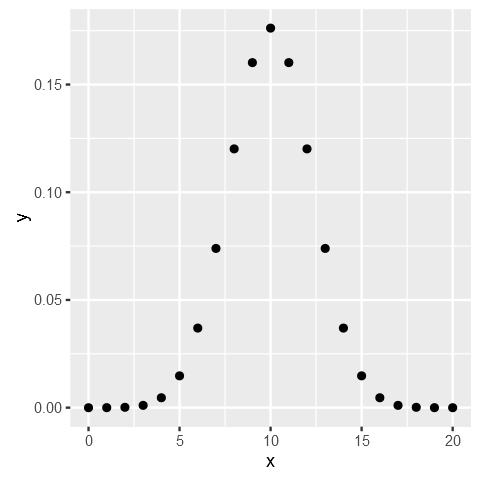

In [4]:
data.frame(x = c(0:20), y = dbinom(c(0:20), 20, 0.5)) %>>% 
    ggplot(aes(x = x, y = y)) + 
        geom_point()

In [5]:
pbinom(c(0:20), 20, 0.5) %>>% round(digit = 4)

[1] 0.0000 0.0000 0.0002 0.0013 0.0059 0.0207 0.0577 0.1316 0.2517 0.4119
[11] 0.5881 0.7483 0.8684 0.9423 0.9793 0.9941 0.9987 0.9998 1.0000 1.0000
[21] 1.0000

棄却域は15勝以上

In [6]:
data.frame(win = c(0:20), prob = pbinom(c(0:20), 20, 0.5)) %>>% filter(prob >= 0.95)

,win,prob
1,14.0000000,0.9793053
2,15.000000,0.994091
3,16.0000000,0.9987116
4,17.0000000,0.9997988
5,18.00000,0.99998
6,19.000000,0.999999
7,20,1


$p$値は

In [7]:
pbinom(16, 20, 0.5, lower.tail = FALSE)

[1] 0.001288414

## 12.3 じゃんけん

10回中7回的中は1/3より高いか

棄却域は7回以上

In [8]:
data.frame(x = c(0:10), prob = pbinom(c(0:10), 10, 1/3)) %>>% filter(prob >= 0.95)

,x,prob
1,6.0000000,0.9803384
2,7.000000,0.996596
3,8.0000000,0.9996444
4,9.0000000,0.9999831
5,10,1


In [9]:
pbinom(6, 10, 1/3, lower.tail = FALSE)

[1] 0.01966164

In [10]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.0 (2016-05-03)
 system   x86_64, mingw32             
 ui       RTerm                       
 language (EN)                        
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-07-07                  

 package    * version    date       source                             
 assertthat   0.1        2013-12-06 CRAN (R 3.3.0)                     
 base64enc    0.1-3      2015-07-28 CRAN (R 3.3.0)                     
 Cairo      * 1.5-9      2015-09-26 CRAN (R 3.3.0)                     
 colorspace   1.2-6      2015-03-11 CRAN (R 3.3.0)                     
 DBI          0.4-1      2016-05-08 CRAN (R 3.3.0)                     
 devtools     1.11.1     2016-04-21 CRAN (R 3.3.0)                     
 digest       0.6.9      2016-01-08 CRAN (R 3.3.0)                     
 dplyr      * 0.5.0      2016-06-24 CRAN (R 3.3.1)                     
 evaluate     0.9        2016-04-29 CRA